# Exercise #1. PCA 

This first example allows you to go through PCA step by step.
It is applied on the data of student marks presented during the course.

---

Reminder of PCA steps :

- Standardize the data X
- Compute the covariance matrix of the features from the dataset : X.T * X
- Perform eigendecompositon on the covariance matrix.
- Order the eigenvectors in decreasing order based on the magnitude of their corresponding eigenvalues.
- Determine q, the number of top principal components to select.
- Construct the projection matrix from the chosen number of top principal components.
- Compute the new q-dimensional feature space.


Import needed packages

In [13]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import normalize 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Laoding the data

In [14]:
df = pd.read_csv("notes.csv")
X = df.iloc[:, 1:].values     # The Original matrix. Each row is an 4 dim figures.
names = df.iloc[:, :1].values # The name of the student.
print(names)
print(X)

[['jean']
 ['alan']
 ['anni']
 ['moni']
 ['didi']
 ['andr']
 ['pier']
 ['brig']
 ['evel']]
[[ 6.   6.   5.   5.5]
 [ 8.   8.   8.   8. ]
 [ 6.   7.  11.   9.5]
 [14.5 14.5 15.5 15. ]
 [14.  14.  12.  12.5]
 [11.  10.   5.5  7. ]
 [ 5.5  7.  14.  11.5]
 [13.  12.5  8.5  9.5]
 [ 9.   9.5 12.5 12. ]]


## Standardisation of X
Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model. Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data

In [15]:
std_scale = preprocessing.StandardScaler().fit(X)
Xn = std_scale.transform(X)
print(Xn)

[[-1.08650256 -1.28173989 -1.50366322 -1.61940264]
 [-0.4938648  -0.61300603 -0.63985669 -0.73070607]
 [-1.08650256 -0.94737296  0.22394984 -0.19748813]
 [ 1.43220792  1.560379    1.51965963  1.75764432]
 [ 1.28404848  1.39319553  0.51188535  0.86894776]
 [ 0.39509184  0.05572782 -1.35969546 -1.0861847 ]
 [-1.234662   -0.94737296  1.08775637  0.51346913]
 [ 0.9877296   0.89164514 -0.49588893 -0.19748813]
 [-0.19754592 -0.11145564  0.65585311  0.69120844]]


Compute and print the mean and the standard deviation of the transformed data (Xn) using "np.mean" and "np.std". What do you notice?

In [17]:
mean = np.mean(Xn)
std = np.std(Xn)
print("La moyenne suivant chaque variable est : ", np.mean(Xn, axis=0)) # mean value for each feature
print("L' ecart type suivant chaque variables est  : ", np.std(Xn, axis=0)) # standard deviation for each feature
# ... 
# ...

La moyenne suivant chaque variable est :  [ 1.81953218e-16 -2.20502629e-16  2.34380416e-16  2.46716228e-17]
L' ecart type suivant chaque variables est  :  [1. 1. 1. 1.]


 # Remarques

We notice that the average (mean) following each variable tends towards 0 that implies that the data is centralized.
 
 The standard deviation following each variable is 1, which implies that the data are well reduced.
 
 The data is reduced and centralized and therefore it is well standardized and homogeneous.

## Computing the covariance matrix

We could use Numpy :
- cov_mat = np.cov(...)

or directly as follows...
- cov_mat = Xn.T.dot(Xn) / (Xn.shape[0]-1)

Check both implementations and compare the results.

In [8]:
# COMPLETE THE CODE HERE
cov_mat = Xn.T.dot(Xn) / (Xn.shape[0]-1)
cov_mat_other = np.cov(Xn)
#print('Covariance matrix shape: ',cov_mat.shape)
#print('Covariance matrix \n%s' %cov_mat) 
print('Covariance matrix shape: ',cov_mat.shape)
print('Covariance matrix \n%s' %cov_mat) 

Covariance matrix shape:  (4, 4)
Covariance matrix 
[[1.125      1.10535269 0.25507342 0.57166198]
 [1.10535269 1.125      0.44627989 0.73297183]
 [0.25507342 0.44627989 1.125      1.07010647]
 [0.57166198 0.73297183 1.07010647 1.125     ]]


# Remarque

We notice that the 2 formulas generate different covariance matrices.


Xn.T.dot(Xn) / (Xn.shape[0]-1) calculates the matrix product between Xn^T and Xn 

mais np.cov(Xn) calculates the matrix product between Xn and Xn^T.

## Eigen decomposition of the covariance matrix

Here, the function "eig" from the linear algebra package of Numpy can be used ("np.linalg")


In [9]:
# COMPLETE THE CODE HERE
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors shape: ', eig_vecs.shape)
print(eig_vecs)
print('Eigenvalues shape: ', eig_vals.shape)
print(eig_vals)

Eigenvectors shape:  (4, 4)
[[-0.47845402 -0.55194891  0.65222562  0.20257316]
 [-0.53191716 -0.40680183 -0.59742507 -0.44120255]
 [-0.44393038  0.62123362  0.36542644 -0.53240785]
 [-0.53951061  0.37938563 -0.29008368  0.69343082]]
Eigenvalues shape:  (4,)
[3.23514762e+00 1.25964828e+00 1.17930919e-03 4.02478885e-03]


## Selecting Principal Components

In [10]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order (All the eigenvalues):')
for tup in eig_pairs[:len(eig_vals)]:
    print(tup[0])

Eigenvalues in descending order (All the eigenvalues):
3.2351476179596492
1.2596482840056922
0.004024788846949778
0.0011793091877089143


In [11]:
# ordonner les vecteurs propres 
for tup in eig_pairs[:len(eig_vals)]:
    print(tup[1])

[-0.47845402 -0.53191716 -0.44393038 -0.53951061]
[-0.55194891 -0.40680183  0.62123362  0.37938563]
[ 0.20257316 -0.44120255 -0.53240785  0.69343082]
[ 0.65222562 -0.59742507  0.36542644 -0.29008368]


### What do you notice? Analyze the obtained eigne values.

We note that the difference between the eigenvalues ​​is large and that the last values ​​are very close to 0 which implies that the quantity of information carried by the two vectors which correspond to these last two values ​​is almost zero.

the inertia is carried by the first two axes corresponding to the first two eigenvectors.


## Explained Variance 
After sorting the eigenpairs, the next question is "how many principal components are we going to choose for our new feature subspace?" A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [21]:
tot_ev = sum(eig_vals)
var_exp = [(cur_ev / tot_ev)*100 for cur_ev in sorted(eig_vals, reverse=True)]

print('the Variance ratio is \n')
print(var_exp[:10])

the Variance ratio is 

[71.8921692879922, 27.99218408901538, 0.08943975215443951, 0.026206870837975873] %%!


# Remarque

Variance ratio designe la quantité d'information portée par les vecteurs propres.

We noticing high values ​​for the first two eigenvectors followed by low values ​​for the last two leads us to conclude that the information is carried mainly (more than 98%) by the first two eigenvectors.

On the other hand, the last two vectors carry a small amount of information, so they can be eliminated by reducing the dimension from 4 to 2 while keeping a very high inertia.

#### Plotting the eigen values considering the explained variance ratio (%).

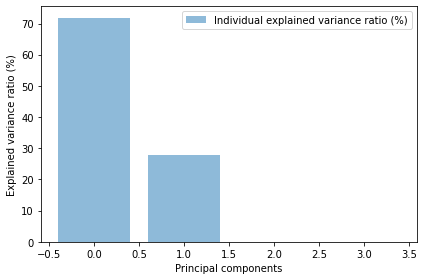

In [23]:
num_eig_val = 4

plt.figure(figsize=(6, 4))
plt.bar(range(num_eig_val), var_exp[:num_eig_val], alpha=0.5, label='Individual explained variance ratio (%)')
plt.ylabel('Explained variance ratio (%)')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

Thanks to the following graph we can visualize the conclusions deduced in the previous remarks

## Projection matrix

The construction of the projection matrix that will be used to transform the initial data onto the new feature subspace. 

In the present case, only 1st and 2nd principal component shares the most inmportant part of information.

Hence, we can drop other components. Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace, by choosing the “top 2” eigenvectors with the highest eigenvalues to construct our d×k-dimensional eigenvector matrix W

In [24]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), 
               eig_pairs[1][1].reshape(4,1)
            ))
print('Matrix W shape :\n', W.shape)

Matrix W shape :
 (4, 2)


### Projection into the New Feature Space (of reduced dimension)
In this last step, we will use the 4×2-dimensional projection matrix W to transform our original vectors (Xstd : 9x4) in the new subspace 
- Xproj = X × W

In [25]:
# COMPLETE THE CODE HERE
Xproj = X.dot(W)
print(Xproj.shape)
print(Xproj)

(9, 2)
[[-11.24918736  -0.55971542]
 [-15.9504974    0.33494802]
 [-16.60272927   4.27842698]
 [-29.62396223   1.41801972]
 [-26.21624377  -1.22538665]
 [-16.80035721  -4.06697206]
 [-18.77431463   7.17687356]
 [-21.76762583  -3.37570954]
 [-21.38255633   3.48589016]]


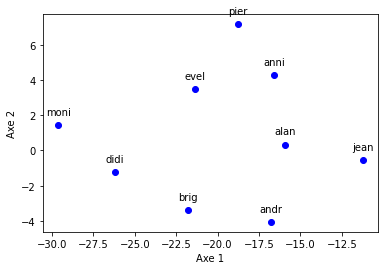

In [26]:
plt.plot(Xproj[:,0], Xproj[:,1], 'bo')
plt.ylabel('Axe 2')
plt.xlabel('Axe 1')

i=0;
for x,y in zip(Xproj[:,0],Xproj[:,1]):
        plt.annotate(names[i,0], (x,y), textcoords="offset points",
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
        i = i+1
plt.show()

# Otherwise, we can use "scikit-learn"

Every thing can be done in 2 lignes!

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
Xproj2 = pca.fit(Xn).transform(Xn)

print(Xproj2.shape)

(9, 2)


### And we can check that resulting PCAs are equivalent.


In [28]:
print(pca.explained_variance_)

print('Xproj2:', Xproj2[:4,])

ev = [cur_ev for cur_ev in sorted(eig_vals, reverse=True)]
print(ev[:4])

print('Xproj:', Xproj[:4,])

[3.23514762 1.25964828]
Xproj2: [[-2.74282765 -0.42739619]
 [-1.24063553 -0.15275975]
 [-1.03089425  1.04928798]
 [ 3.13812885  0.18561802]]
[3.2351476179596492, 1.2596482840056922, 0.004024788846949778, 0.0011793091877089143]
Xproj: [[-11.24918736  -0.55971542]
 [-15.9504974    0.33494802]
 [-16.60272927   4.27842698]
 [-29.62396223   1.41801972]]


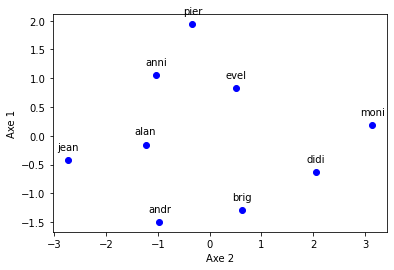

In [29]:
plt.plot(Xproj2[:,0], Xproj2[:,1], 'bo')
plt.xlabel('Axe 2')
plt.ylabel('Axe 1')

h=0;
for x,y in zip(Xproj2[:,0],Xproj2[:,1]):
        plt.annotate(names[h,0], (x,y), textcoords="offset points",
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
        h = h+1
plt.show()

# Remarque 

We notice that the two methods using Xproj1 and Xproj2 lead to the same representation of the point cloud in Euclidean space at one sing.

The negative sign is due to the fact that the projection along the axis can be represented by two opposite direction vectors of sign that implies a difference of sign between the two representations.

# Conclusion

-The PCA is a fundamental method in multidimensional descriptive analysis which makes it possible to reduce the dimension (attributes) in order to be able to visualize the data.

- On Python there are two methods to apply PCA

The first method consists in applying step by step the mathematical laws which constitute the PCA algorithm

The second method consists in using the library scikit-learn which allows to apply the ACP more quickly.